<div style="width:100%; background-color: #D9EDF7; border: 1px solid #CFCFCF; text-align: left; padding: 10px;">
      <b>Renewable power plants: Main notebook</b>
      <ul>
        <li>Main notebook</li>
        <li><a href="download_and_process.ipynb">Download and process notebook</a></li>
        <li><a href="validation_and_output.ipynb">Validation and output notebook</a></li>
      </ul>
      <br>This notebook is part of the <a href="http://data.open-power-system-data.org/renewable_power_plants"> Renewable power plants Data Package</a> of <a href="http://open-power-system-data.org">Open Power System Data</a>.
</div>

# About Open Power System Data 
This Notebook is part of the project [Open Power System Data](http://open-power-system-data.org). Open Power System Data develops a platform for free and open data for electricity system modeling. We collect, check, process, document, and provide data that are publicly available but currently inconvenient to use. 
More info on Open Power System Data:
- [Information on the project on our website](http://open-power-system-data.org)
- [Data and metadata on our data platform](http://data.open-power-system-data.org)
- [Data processing scripts on our GitHub page](https://github.com/Open-Power-System-Data)

# About Jupyter Notebooks and GitHub
This file is a [Jupyter Notebook](http://jupyter.org/). A Jupyter Notebook is a file that combines executable programming code with visualizations and comments in markdown format, allowing for an intuitive documentation of the code. We use Jupyter Notebooks for combined coding and documentation. We use Python 3 as programming language. All Notebooks are stored on [GitHub](https://github.com/), a platform for software development, and are publicly available. More information on our IT-concept can be found [here](http://open-power-system-data.org/it). See also our [step-by-step manual](http://open-power-system-data.org/step-by-step) how to use the dataplatform.
 
# About this Data Package
We provide data in different chunks, or [Data Packages](http://frictionlessdata.io/data-packages/). The one you are looking at right now, [Renewable power plants](http://data.open-power-system-data.org/renewable_power_plants/), contains

* lists of renewable energy power plants of selected countries in Europe
* daily time series of cumulated installed capacity per energy source type for Germany.

Due to differing data availability, the power plant lists are of variable accuracy and partly provide different power plant parameters. Therefore the lists are provided in addition to the overall European list also as separate CSV files per country and as separate sheets in the Excel file, which contain more information than the European list.

# Set up the notebook

Import packages and modules needed to automatically generate parts of this notebook.

In [1]:
import importlib
import os
import json
import matplotlib as plt
from IPython.display import display
import os
import pandas as pd
import util.helper
import util.visualizer

version = '2020-08-25'

# Countries

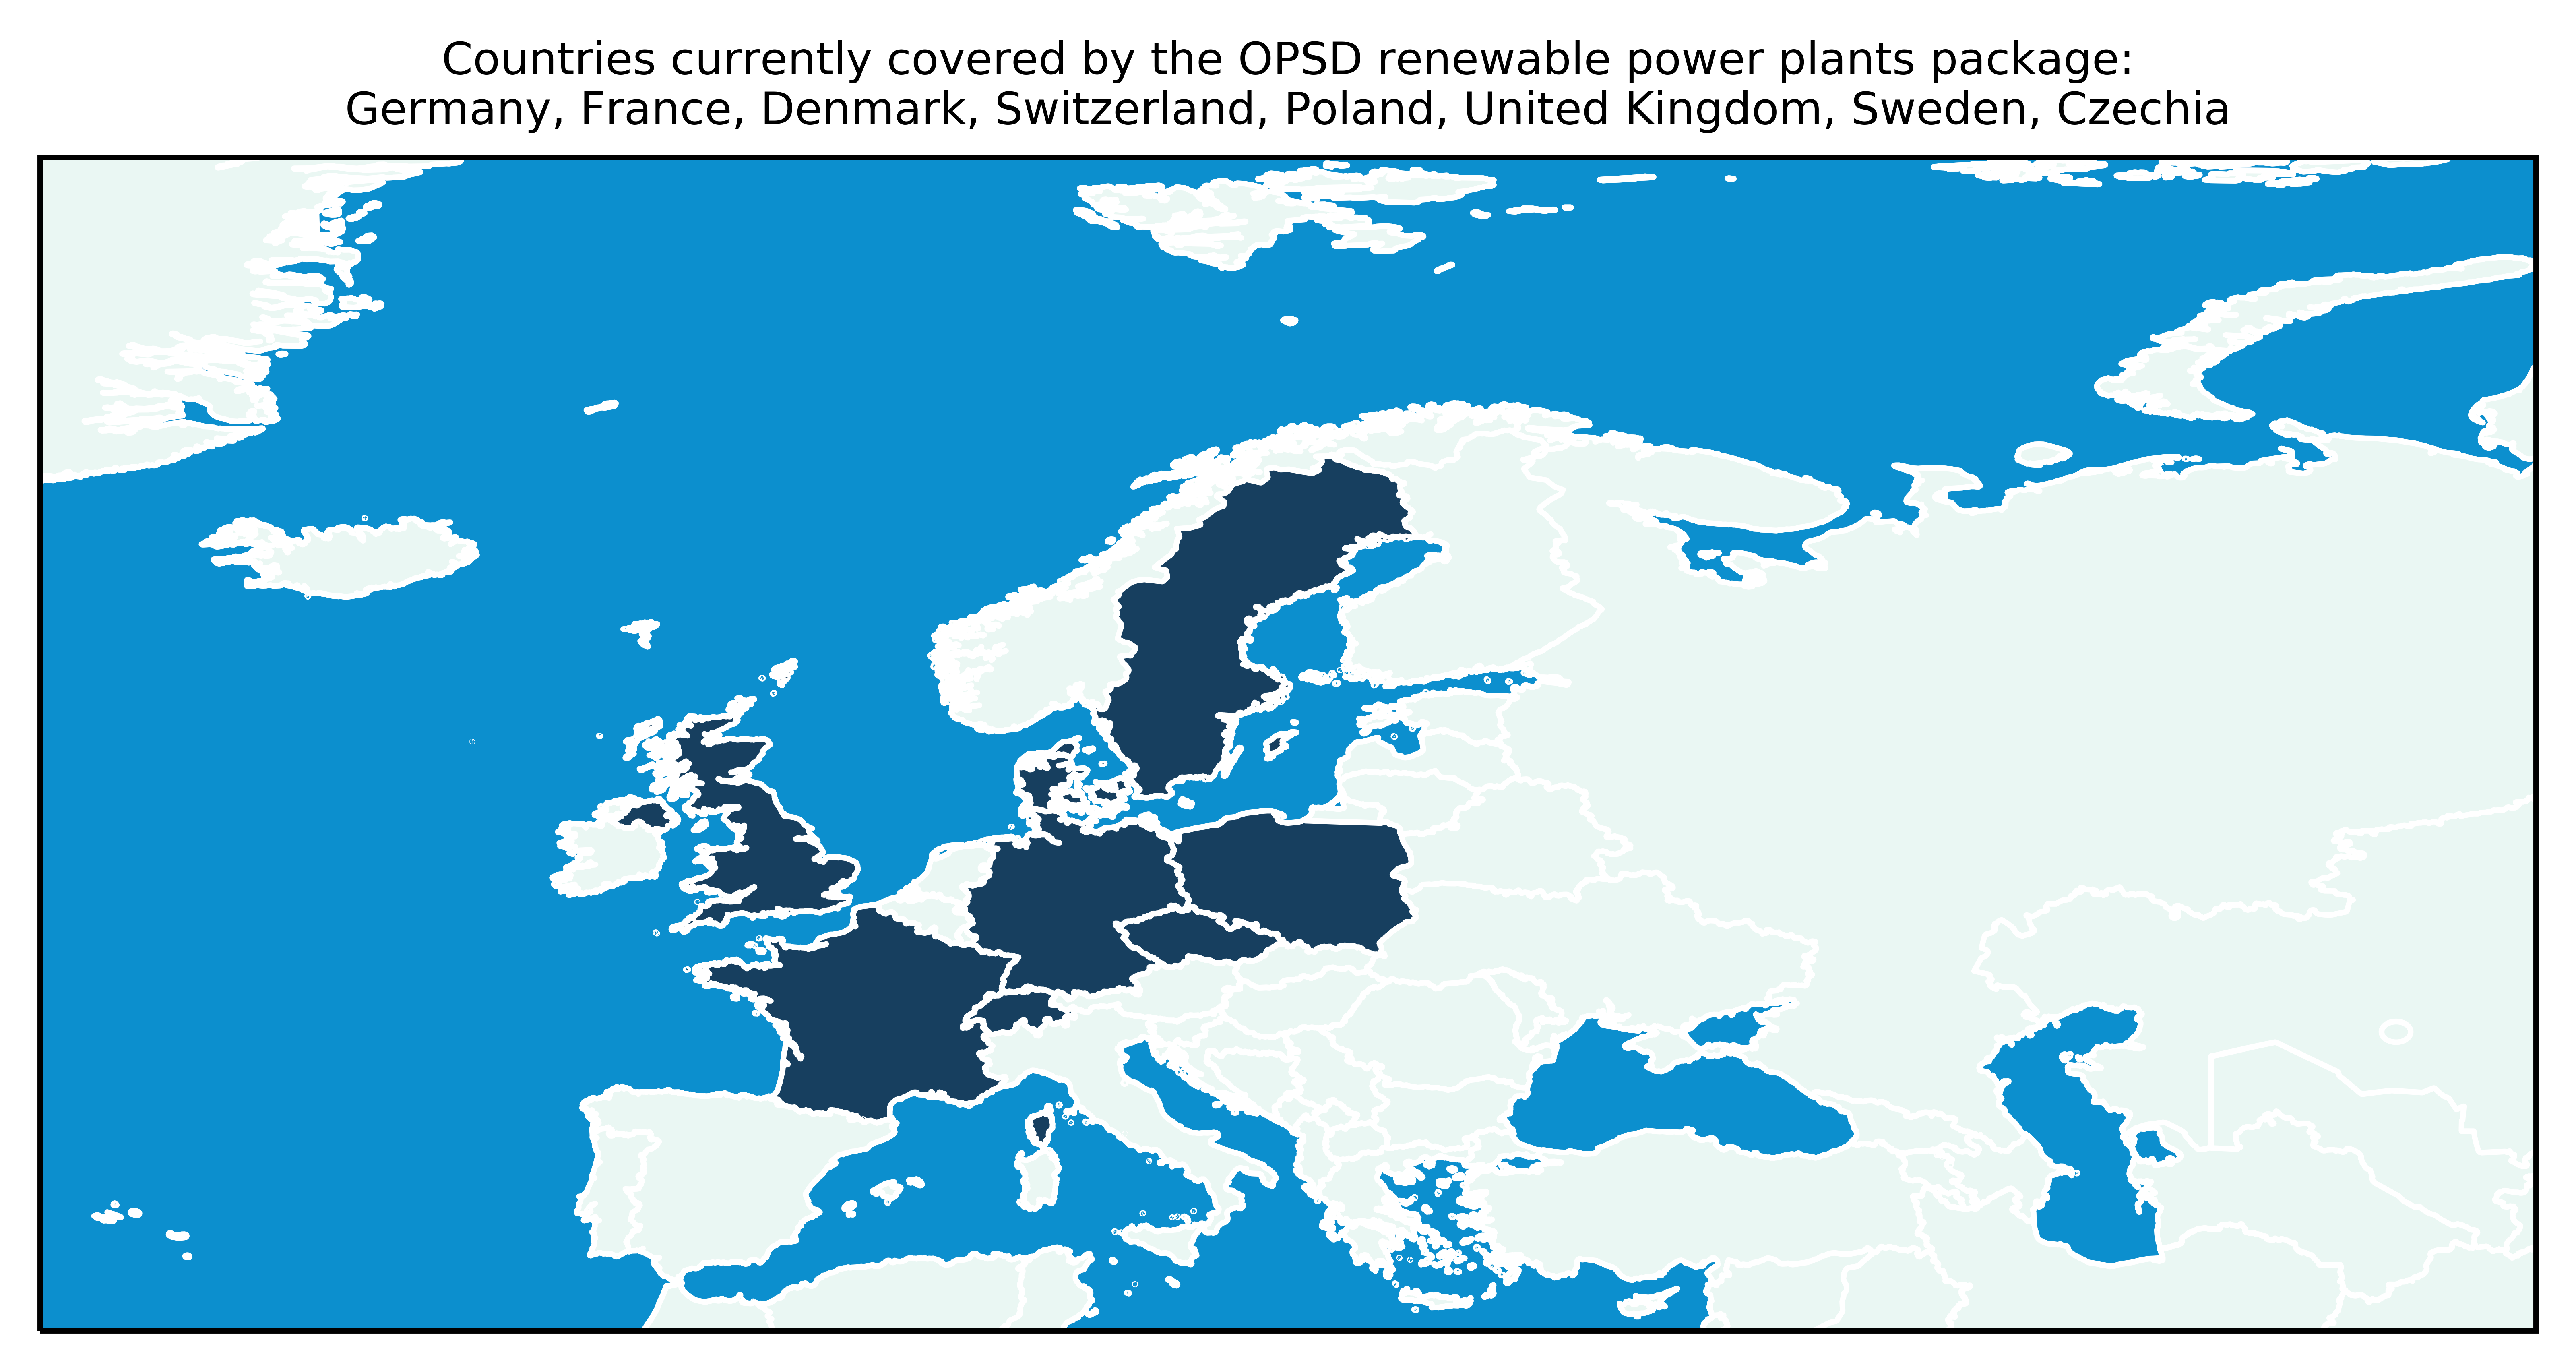

In [2]:
country_list_filepath = os.path.join('input', 'countries.csv')
countries_df = pd.read_csv(country_list_filepath)
util.visualizer.visualize_countries(countries_df['full_name'].tolist())

# Data sources

This Data Package uses the following main data sources (run the next cell to auto-generate the list of sources used).

A complete list of data sources is provided on the [Data Package information website](http://data.open-power-system-data.org/renewable_power_plants/). They are also contained in the JSON file that contains all metadata.

In [3]:
import importlib
importlib.reload(util.helper)

source_list_filepath = os.path.join('input', 'sources.csv')
country_list_filepath = os.path.join('input', 'countries.csv')
countries_df = pd.read_csv(country_list_filepath)
sources_df = pd.read_csv(source_list_filepath)
metadata_path = 'output/renewable_power_plants/{}/datapackage.json'.format(version)
with open(metadata_path) as json_file:
    metadata = json.load(json_file)

markdowns = util.helper.get_markdowns_for_sources(countries_df, sources_df, metadata)
for markdown in markdowns:
    display(markdown)

## Germany - DE
Individual power plants, all renewable energy plants supported by the German Renewable Energy Law (EEG).
In Germany, the four TSOs (50Hertz, Amprion, Tennet, TransnetBW) publish individual plant-level data on renewable power plants on their joint platform Netztransparenz.de. Since they are only updated once per year (usually in August) for the past year, their data is often a bit outdated. We therefore complement their data with data from BNetzA, which has more recent data.

Since August 2014 the BNetzA is responsible to publish the renewable power plants register. The legal framework for the register is  specified in the EEG 2014 [(German)](http://www.gesetze-im-internet.de/eeg_2014/) [(English)](http://www.res-legal.eu/search-by-country/germany/single/s/res-e/t/promotion/aid/feed-in-tariff-eeg-feed-in-tariff/lastp/135/). All power plants are listed in a new format: two separate MS-Excel and CSV files for roof-mounted PV power plants ['PV-Datenmeldungen'](https://www.bundesnetzagentur.de/DE/Sachgebiete/ElektrizitaetundGas/Unternehmen_Institutionen/ErneuerbareEnergien/ZahlenDatenInformationen/EEG_Registerdaten/EEG_Registerdaten_node.html) and all other renewable power plants [' Anlagenregister'](https://www.bundesnetzagentur.de/DE/Sachgebiete/ElektrizitaetundGas/Unternehmen_Institutionen/ErneuerbareEnergien/ZahlenDatenInformationen/EEG_Registerdaten/EEG_Registerdaten_node.html).

From the beginning of 2019, BNetzA has switched to the Marktstammdatenregister (MaStR, central register for installation data). This is, however, not used yet for OPSD data. We will change to using the MaStR most likely for the 2020 version of the OPSD data package.


- [Bundesnetzagentur](https://www.bundesnetzagentur.de/SharedDocs/Downloads/DE/Sachgebiete/Energie/Unternehmen_Institutionen/ErneuerbareEnergien/ZahlenDatenInformationen/VOeFF_Registerdaten/2019_01_Veroeff_RegDaten.xlsx?__blob=publicationFile&v=2) - Bundesnetzagentur register of renewable power plants (excl. PV)
- [bnetza_pv_historic](https://www.bundesnetzagentur.de/SharedDocs/Downloads/DE/Sachgebiete/Energie/Unternehmen_Institutionen/ErneuerbareEnergien/ZahlenDatenInformationen/PV_Datenmeldungen/Archiv_PV/Meldungen_Aug-Juni2017.xlsx?__blob=publicationFile&v=2) - Bundesnetzagentur register of PV power plants
- [bnetza_pv](https://www.bundesnetzagentur.de/SharedDocs/Downloads/DE/Sachgebiete/Energie/Unternehmen_Institutionen/ErneuerbareEnergien/ZahlenDatenInformationen/PV_Datenmeldungen/Meldungen_Juli17-Jan19.xlsx?__blob=publicationFile&v=2) - Bundesnetzagentur register of PV power plants
- [Amprion](https://www.netztransparenz.de/portals/1/Netztransparenz%20Anlagenstammdaten%202019%20Amprion%20GmbH.zip) - Netztransparenz.de - information platform of German TSOs (register of renewable power plants in their control area)
- [TransnetBW](https://www.netztransparenz.de/portals/1/Netztransparenz%20Anlagenstammdaten%202019%20TransnetBW%20GmbH.zip) - Netztransparenz.de - information platform of German TSOs (register of renewable power plants in their control area)
- [50Hertz](https://www.netztransparenz.de/portals/1/Netztransparenz%20Anlagenstammdaten%202019%2050Hertz%20Transmission%20GmbH.zip) - Netztransparenz.de - information platform of German TSOs (register of renewable power plants in their control area)
- [Tennet](https://www.netztransparenz.de/portals/1/Netztransparenz%20Anlagenstammdaten%202019%20TenneT%20TSO%20GmbH.zip) - Netztransparenz.de - information platform of German TSOs (register of renewable power plants in their control area)

The columns available in the data table provided by OPSD:

| column | type | description |
|:---|:---|:---|
| electrical_capacity | number | Installed electrical capacity in MW |
| energy_source_level_1 | string | Type of energy source (e.g. Renewable energy) |
| energy_source_level_2 | string | Type of energy source (e.g. Wind, Solar) |
| energy_source_level_3 | string | Subtype of energy source (e.g. Biomass and biogas) |
| technology | string | Technology to harvest energy source (e.g. Onshore, Photovoltaics) |
| data_source | string | Source of database entry |
| nuts_1_region | string | The code of the NUTS 1 region the facility is in (e.g. DE1). |
| nuts_2_region | string | The code of the NUTS 2 region the facility is in (e.g. DE11). |
| nuts_3_region | string | The code of the NUTS 3 region the facility is in (e.g. DE111). |
| lon | number | Longitude coordinates |
| lat | number | Latitude coordinates |
| municipality | string | Name of German Gemeinde (municipality) |
| municipality_code | string | German Gemeindenummer (municipalitiy number) |
| postcode | string | German zip-code |
| address | string | Street name or name of land parcel |
| federal_state | string | Name of German administrative level 'Bundesland' |
| commissioning_date | date | Date of commissioning of specific unit |
| decommissioning_date | date | Date of decommissioning of specific unit |
| voltage_level | string | Voltage level of grid connection |
| eeg_id | string | Power plant EEG (German feed-in tariff law) remuneration number |
| dso | string | Name of distribution system operator of the region the plant is located in |
| dso_id | string | Company number of German distribution grid operator |
| tso | string | Name of transmission system operator of the area the plant is located |


## France - FR
Renewable energy sources in France (wind, solar, hydro, geothermal, bioenergy, marine).

- [Ministère de la Transition écologique et solidaire](http://www.statistiques.developpement-durable.gouv.fr/sites/default/files/2019-01/donnees-locales-2017-loi2000-secretise.xls) - Ministry for the Ecological and Inclusive Transition

> The data is annually published on the French [website for statistics](https://www.statistiques.developpement-durable.gouv.fr/donnees-locales-relatives-aux-installations-de-production-delectricite-renouvelable-beneficiant-0?rubrique=23&dossier=189) as an Excel file. The Excel chart includes number and installed capacity of the different renewable source for every municipality in France. It is limited to the plants which are covered by article 10 of february 2000 by an agreement to a purchase commitment.


- [Open Data Réseaux Energies](https://opendata.reseaux-energies.fr/explore/dataset/registre-national-installation-production-stockage-electricite-agrege-311218/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B) - Platform Open Data Réseaux Énergies (ODRÉ) with various open and free data sets

> This register presents the electricity production and storage facilities connected directly or indirectly to public electricity networks in mainland France and in non-interconnected areas (ZNI) as of December 31, 2018.


The columns available in the data table provided by OPSD:

| column | type | description |
|:---|:---|:---|
| electrical_capacity | number | Installed electrical capacity in MW |
| energy_source_level_1 | string | Type of energy source (e.g. Renewable energy) |
| energy_source_level_2 | string | Type of energy source (e.g. Wind, Solar) |
| energy_source_level_3 | string | Subtype of energy source (e.g. Biomass and biogas) |
| technology | string | Technology to harvest energy source (e.g. Onshore, Photovoltaics) |
| data_source | string | Source of database entry |
| nuts_1_region | string | The code of the NUTS 1 region the facility is in (e.g. FR1). |
| nuts_2_region | string | The code of the NUTS 2 region the facility is in (e.g. FR10). |
| nuts_3_region | string | The code of the NUTS 3 region the facility is in (e.g. FR101). |
| lon | number | Longitude coordinates |
| lat | number | Latitude coordinates |
| municipality | string | Name of French Commune |
| municipality_code | integer | French 5-digit INSEE code for Communes |
| region | string | Name of the French region |
| region_code | integer | Code of the French region |
| municipality_group | string | Name of the group of municipalities the plant is located in. |
| municipality_group_code | integer | Code of the group of municipalities the plant is located in. |
| departement | string | The name of the French departement |
| departement_code | integer | The number of the French departement |
| commissioning_date | date | The date of the plant's commissioning |
| connection_date | date | The data when the plant was connected to the French grid |
| disconnection_date | date | The date that the plant was disconnected from the French grid |
| number_of_installations | integer | Number of installations of the energy source subtype in the municipality. Due to confidentiality reasons, the values smaller than 3 are published as ''<3'' (as in the source). |
| site_name | string | The power plant's name. |
| IRIS_code | string | IRIS code |
| EIC_code | string | Energy Identification Code - the plant's unique identifier in the French grid |
| as_of_year | integer | Year for which the data source compiled the original dataset. |


## Denmark - DK
Wind and phovoltaic power plants with a high level of detail.

- [Energystyrelsen](https://ens.dk/sites/ens.dk/files/Statistik/anlaegprodtilnettet.xls) - Energy Agency Denmark

> The Danish Energy Agency publishes a national master data register for wind turbines which was created in collaboration with the transmission system operators. The publication is monthly as an Excel file. The data set includes all electricity-generating wind turbines with information about technical data, location data and production data.


- [Energinet](https://data.open-power-system-data.org/renewable_power_plants/2018-03-08/original_data/SolcellerGraf-2016-11.xlsx) - Transmission system Operator in Denmark

> The photovoltaic statistic used to be published from Energinet, included information about location, year of implementing, installed capacity and number of systems. Since Energinet stopped publishing this, and the Danish Energy Agency, which has taken over the job of keeping that register has not published a register yet, we revert to old data for Danish solar from our previous OPSD data package version.


The columns available in the data table provided by OPSD:

| column | type | description |
|:---|:---|:---|
| electrical_capacity | number | Installed electrical capacity in MW |
| energy_source_level_1 | string | Type of energy source (e.g. Renewable energy) |
| energy_source_level_2 | string | Type of energy source (e.g. Wind, Solar) |
| energy_source_level_3 | string | Subtype of energy source. |
| technology | string | Technology to harvest energy source (e.g. Onshore, Photovoltaics) |
| data_source | string | Source of database entry |
| nuts_1_region | string | The code of the NUTS 1 region the facility is in (e.g. DK0). |
| nuts_2_region | string | The code of the NUTS 2 region the facility is in (e.g. DK01). |
| nuts_3_region | string | The code of the NUTS 3 region the facility is in (e.g. DK013). |
| lon | number | Longitude coordinates |
| lat | number | Latitude coordinates |
| municipality | string | Name of Danish Kommune |
| municipality_code | string | Danish 3-digit Kommune-Nr |
| postcode | string | Danish zip-code |
| address | string | Street name or name of land parcel |
| commissioning_date | date | date of the plant's commissioning |
| hub_height | number | Wind turbine hub heigth in m |
| rotor_diameter | number | Wind turbine rotor diameter in m |
| model | string | Wind turbine model type |
| gsrn_id | integer | Danish wind turbine identifier number (GSRN) |
| dso | string | Name of distribution system operator of the region the plant is located in |
| manufacturer | string | Company that has built the wind turbine |


## Switzerland - CH
All renewable-energy power plants supported by the feed-in-tariff KEV (Kostendeckende Einspeisevergütung).

- [Bundesamt für Energie](https://pubdb.bfe.admin.ch/de/publication/download/9669) - Swiss Federal Office of Energy

> Data of all renewable power plants receiving 'Kostendeckende Einspeisevergütung' (KEV) which is the Swiss feed in tarif for renewable power plants. Geodata is based on municipality codes.


The columns available in the data table provided by OPSD:

| column | type | description |
|:---|:---|:---|
| electrical_capacity | number | Installed electrical capacity in MW |
| energy_source_level_1 | string | Type of energy source (e.g. Renewable energy) |
| energy_source_level_2 | string | Type of energy source (e.g. Wind, Solar) |
| energy_source_level_3 | string | Type of energy source (e.g. Biomass and biogas) |
| technology | string | Technology to harvest energy source (e.g. Onshore, Photovoltaics) |
| data_source | string | Source of database entry |
| nuts_1_region | string | The code of the NUTS 1 region the facility is in (e.g. CH0). |
| nuts_2_region | string | The code of the NUTS 2 region the facility is in (e.g. CH03). |
| nuts_3_region | string | The code of the NUTS 3 region the facility is in (e.g. CH031). |
| lon | number | Longitude coordinate |
| lat | number | Latitude coordinate |
| municipality | string | Municipality |
| municipality_code | integer | Municipality code |
| postcode | string | Swiss zip code |
| address | string | Street name |
| canton | string | Name of the cantones/ member states of the Swiss confederation |
| commissioning_date | date | Commissioning date |
| contract_period_end | date | End of subsidy contract |
| company | string | Name of the company |
| tariff | number | Tariff in CHF for 2016 |
| project_name | string | Name of the project |
| production | number | Yearly production in MWh |


## Poland - PL
Summed capacity and number of installations per energy source per municipality (Powiat).

- [Urzad Regulacji Energetyki](https://www.ure.gov.pl/download/9/10922/Instalacjeodnawialnychzrodelenergiiwgstanunadzien31grudnia2019r.xlsx) - Energy Regulatory Office of Poland

> Installed capacities of renewable-energy power plants in Poland. The plants are anonymized in the sense that no names, post codes or geographical coordinates are present. They are described by: the energy type their use, installed capacity, województwo (province) and powiat (district) that they are located in.


The columns available in the data table provided by OPSD:

| column | type | description |
|:---|:---|:---|
| electrical_capacity | number | Installed electrical capacity in MW |
| energy_source_level_1 | string | Type of energy source (e.g. Renewable energy) |
| energy_source_level_2 | string | Type of energy source (e.g. Wind, Solar) |
| energy_source_level_3 | string | Subtype of energy source (e.g. Biomass and biogas) |
| technology | string | Technology to harvest energy source (e.g. Onshore, Photovoltaics) |
| data_source | string | Source of database entry |
| nuts_1_region | string | The code of the NUTS 1 region the facility is in (e.g. PL1). |
| nuts_2_region | string | The code of the NUTS 2 region the facility is in (e.g. PL11). |
| nuts_3_region | string | The code of the NUTS 3 region the facility is in (e.g. PL113). |
| region | string | The name of the Polish voivodeship. |
| district | string | The name of the Polish powiat. |
| URE_id | integer | The URE id of the plant. |
| as_of_year | integer | Year for which the data source compiled the original dataset. |


## United Kingdom - UK
Renewable-energy power plants in the United Kingdom.

- [UK Government Department for Business, Energy & Industrial Strategy](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/901383/renewable-energy-planning-database-June-2020-update.csv) - Renewable Energy Planning Database quarterly extract

> The Renewable Energy Planning Database (REPD) is managed by Eunomia Research and Consulting Ltd (Eunomia) on behalf of the Department of Business, Energy & Industrial Strategy (BEIS). The database tracks the progress of renewable electricity projects (including those that could also be used for combined heat and power (CHP)).


The columns available in the data table provided by OPSD:

| column | type | description |
|:---|:---|:---|
| electrical_capacity | number | Installed electrical capacity in MW |
| energy_source_level_1 | string | Type of energy source (e.g. Renewable energy) |
| energy_source_level_2 | string | Type of energy source (e.g. Wind, Solar) |
| energy_source_level_3 | string | Type of energy source (e.g. Biomass and biogas) |
| technology | string | Technology to harvest energy source (e.g. Onshore, Photovoltaics) |
| data_source | string | The source of database entries |
| nuts_1_region | string | The code of the NUTS 1 region the facility is in (e.g. UKD). |
| nuts_2_region | string | The code of the NUTS 2 region the facility is in (e.g. UKD1). |
| nuts_3_region | string | The code of the NUTS 3 region the facility is in (e.g. UKC12). |
| lon | string | Longitude coordinates |
| lat | string | Latitude coordinates |
| municipality | string | Municipality |
| postcode | string | Postcode |
| address | string | Address |
| region | string | Region |
| country | string | The UK's constituent country in which the facility is located. |
| commissioning_date | date | Date of commissioning of specific unit |
| solar_mounting_type | string | For solar PV developments, whether the PV panels are ground or roof mounted |
| chp | string | Is the project capable of combined heat and power output |
| capacity_individual_turbine | number | For windfarms, the individual capacity of each wind turbine in megawatts (MW) |
| number_of_turbines | integer | For windfarms, the number of wind turbines located on the site |
| site_name | string | Name of site |
| uk_beis_id | integer | ID for the plant as assigned by UK BEIS. |
| operator | string | Name of operator |
| comment | string | Shortcodes for comments related to this entry, explanation can be looked up in validation_marker.csv |


## Sweden - SE
Wind power plants in Sweden.
- [Vindbrukskollen](http://ext-dokument.lansstyrelsen.se/Gemensamt/Geodata/Externa%20dokument/VBK/VBK_export_allman_prod.xlsx) - Wind farms in Sweden.

The columns available in the data table provided by OPSD:

| column | type | description |
|:---|:---|:---|
| electrical_capacity | number | Installed electrical capacity in MW. |
| energy_source_level_1 | string | Type of energy source (e.g. Renewable energy) |
| energy_source_level_2 | string | Type of energy source (e.g. Wind, Solar) |
| energy_source_level_3 | string | Type of energy source (e.g. Biomass and biogas) |
| technology | string | Technology to harvest energy source (e.g. Onshore, Photovoltaics) |
| data_source | string | Source of database entry |
| nuts_1_region | string | The code of the NUTS 1 region the facility is in (e.g. SE0). |
| nuts_2_region | string | The code of the NUTS 2 region the facility is in (e.g. SE02). |
| nuts_3_region | string | The code of the NUTS 3 region the facility is in (e.g. SE021). |
| lon | number | Longitude coordinates |
| lat | number | Latitude coordinates |
| municipality | string | Municipality |
| county | string | County |
| commissioning_date | date | Commissioning date |
| site_name | string | Name of site |
| se_vindbrukskollen_id | string | The id in the vindbrukskollen data |
| manufacturer | string | Manufacturer |


## Czechia - CZ
Renewable-energy power plants in Czech Republic.

- [Energetický regulační úřad](http://licence.eru.cz/index.php) - Energy Regulatory Office

> Renewable-energy facilities in Czech Republic.


The columns available in the data table provided by OPSD:

| column | type | description |
|:---|:---|:---|
| electrical_capacity | number | Installed electrical capacity in MW. |
| energy_source_level_1 | string | Type of energy source (e.g. Renewable energy) |
| energy_source_level_2 | string | Type of energy source (e.g. Wind, Solar) |
| energy_source_level_3 | string | Type of energy source (e.g. Biomass and biogas) |
| technology | string | Technology to harvest energy source (e.g. Onshore, Photovoltaics) |
| data_source | string | Source of database entry |
| nuts_1_region | string | The code of the NUTS 1 region the facility is in (e.g. CZ0). |
| nuts_2_region | string | The code of the NUTS 2 region the facility is in (e.g. CZ08). |
| nuts_3_region | string | The code of the NUTS 3 region the facility is in (e.g. CZ08-). |
| lon | number | Longitude coordinates |
| lat | number | Latitude coordinates |
| municipality | string | Municipality |
| postcode | string | Postcode |
| region | string | Region |
| locality | string | Town or village |
| owner | string | Owner |
| site_name | string | Name of site |


# Naming Conventions
## Column translation list
This list provides all internal translations of column original names to the OPSD standard names in order to achieve common data structure for data of all implemented countries as well as the other data packages. 

In [4]:
import pandas as pd
pd.read_csv('input/column_translation_list.csv')

original_name             opsd_name  \
0                      ÜNB                   tso   
1                REGELZONE                   tso   
2    Regelzonenbezeichnung                   tso   
3    REGELZONENBEZEICHNUNG                   tso   
4       Netzbetreiber Name                   dso   
..                     ...                   ...   
205        holder_postcode        owner_postcode   
206        holder_locality        owner_locality   
207        holder_district    owner_municipality   
208  holder_representative  owner_representative   
209            energy_type            technology   

                                   description country  \
0         Name of transmission system operator      DE   
1         Name of transmission system operator      DE   
2         Name of transmission system operator      DE   
3         Name of transmission system operator      DE   
4         Name of distribution system operator      DE   
..                                         ...     ...   
205          the postcode of the plant's owner      CZ   
206      the city or a village the owner is in      CZ   
207  the municipality in which the owner is in      CZ   
208    the representative of the plant's owner      CZ   
209                                        NaN      CZ   

                                 data_source  
0    50Hertz / Amprion / TenneT / TransnetBW  
1    50Hertz / Amprion / TenneT / TransnetBW  
2    50Hertz / Amprion / TenneT / TransnetBW  
3    50Hertz / Amprion / TenneT / TransnetBW  
4    50Hertz / Amprion / TenneT / TransnetBW  
..                                       ...  
205                                      ERU  
206                                      ERU  
207                                      ERU  
208                                      ERU  
209                                      ERU  

[210 rows x 5 columns]

## Value translation list

This list provides all internal translations of original value names to the OPSD standard names in order to achieve common data structure for data of all implemented countries as well as the other data packages. 

In [5]:
import pandas as pd
pd.read_csv('input/value_translation_list.csv')

original_name                opsd_name energy_source_level_2  \
0             Wind Land                  Onshore                  Wind   
1              Wind See                 Offshore                  Wind   
2               Klärgas  Sewage and landfill gas             Bioenergy   
3             Grubengas       Other fossil fuels    Other fossil fuels   
4         Freifläche PV     Photovoltaics ground                 Solar   
..                  ...                      ...                   ...   
166               solar                      NaN                 Solar   
167               hydro                      NaN                 Hydro   
168                wind                      NaN                  Wind   
169         unspecified                      NaN  Other or unspecified   
170  biogas and biomass       Biomass and biogas             Bioenergy   

    country                                       data_source  
0        DE                                            BNetzA  
1        DE                                            BNetzA  
2        DE  BNetzA / TransnetBW / TenneT / 50Hertz / Amprion  
3        DE                                   BnetzA/ Amprion  
4        DE                                            BNetzA  
..      ...                                               ...  
166      CZ                                               ERU  
167      CZ                                               ERU  
168      CZ                                               ERU  
169      CZ                                               ERU  
170      CZ                                               ERU  

[171 rows x 5 columns]

## Energy source structure
![OPSD-Tree](http://open-power-system-data.org/2016-10-25-opsd_tree.svg)
 
# License
This Jupyter Notebook as well as all other documents in this repository is published under the [MIT License](LICENSE.md).